In [1]:
#Project : Titanic - Machine Learnign from Disaster

# import Lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load dataset
train_df = pd.read_csv(r"./train.csv")
test_df = pd.read_csv(r"./test.csv")

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
test_df.columns


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#preview data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# chuyen passengerID thanh index
train_df.set_index(train_df.PassengerId, inplace =True)

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.drop('PassengerId', axis = 1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [9]:
# 1.Feature Classification : catergorical (chữ, string, ...) & numerical (số) & mix (chu + so)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [10]:
# nhan thay dataset bi thieu (cabin : 204, age: 714, Embarked : 889) => take note cac gia tri bi thieu


In [11]:
train_df['Survived'] = train_df['Survived'].astype("category")

In [12]:
train_df['Survived'].dtype
#chuyen output survive or not thanh 0 or 1

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 84.5+ KB


In [14]:
features = ["Pclass","Sex","SibSp","Parch","Embarked"]
def convert_cat(df,features):
    for feature in features : 
        df[feature] = df[feature].astype("category")
convert_cat (train_df,features)
convert_cat (test_df,features)

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    category
 7   Parch        891 non-null    category
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(6), float64(2), int64(1), object(3)
memory usage: 55.1+ KB


In [16]:
train_df.describe()

,PassengerId,Age,Fare
count,891.000000,714.000000,891.000000
mean,446.000000,29.699118,32.204208
std,257.353842,14.526497,49.693429
min,1.000000,0.420000,0.000000
25%,223.500000,20.125000,7.910400
50%,446.000000,28.000000,14.454200
75%,668.500000,38.000000,31.000000
max,891.000000,80.000000,512.329200


In [17]:
train_df.describe()

,PassengerId,Age,Fare
count,891.000000,714.000000,891.000000
mean,446.000000,29.699118,32.204208
std,257.353842,14.526497,49.693429
min,1.000000,0.420000,0.000000
25%,223.500000,20.125000,7.910400
50%,446.000000,28.000000,14.454200
75%,668.500000,38.000000,31.000000
max,891.000000,80.000000,512.329200


In [18]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    category
 2   Name         418 non-null    object  
 3   Sex          418 non-null    category
 4   Age          332 non-null    float64 
 5   SibSp        418 non-null    category
 6   Parch        418 non-null    category
 7   Ticket       418 non-null    object  
 8   Fare         417 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    category
dtypes: category(5), float64(2), int64(1), object(3)
memory usage: 22.8+ KB


In [19]:
test_df.describe()

,PassengerId,Age,Fare
count,418.000000,332.000000,417.000000
mean,1100.500000,30.272590,35.627188
std,120.810458,14.181209,55.907576
min,892.000000,0.170000,0.000000
25%,996.250000,21.000000,7.895800
50%,1100.500000,27.000000,14.454200
75%,1204.750000,39.000000,31.500000
max,1309.000000,76.000000,512.329200


In [20]:
#Distribution of Categorical features
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


In [21]:
#3. Exploratory Data Analysis (EDA)
# target category : "Survived"
train_df["Survived"].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [22]:
train_df["Survived"].value_counts(normalize=True).to_frame()
# in ra phan tram

,proportion
Survived,
0,0.616162
1,0.383838


In [23]:
### examize the first category : "Sex"
train_df["Sex"].value_counts().to_frame()

,count
Sex,
male,577
female,314


In [24]:
train_df["Sex"].value_counts(normalize=True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


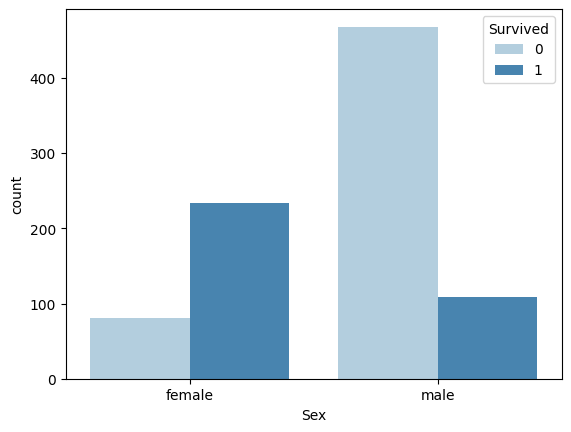

In [25]:
#visualize = graph
sns.countplot(data=train_df,x='Sex', hue = "Survived", palette="Blues");

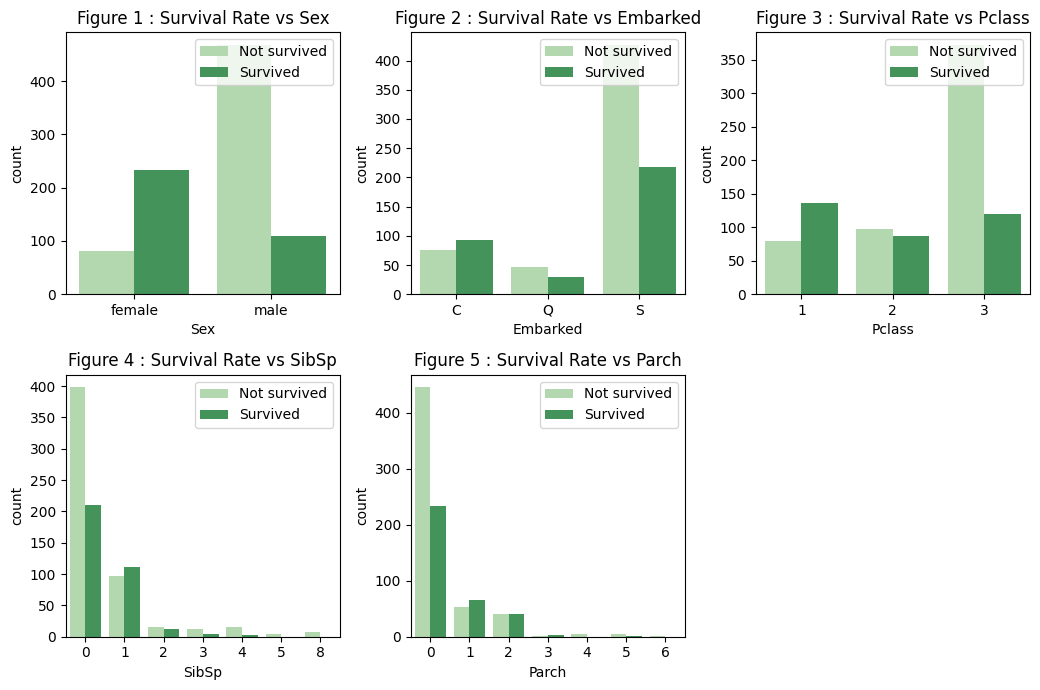

In [26]:
#remaining categorical feture columns
cols = ['Sex','Embarked','Pclass','SibSp','Parch']
n_rows = 2
n_cols = 3
fig, ax =plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r*n_cols +c # index to loop through the list "cols"
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=train_df,x = cols[i], hue = "Survived", palette= "Greens", ax= ax_i)
            ax_i.set_title(f"Figure {i+1} : Survival Rate vs {cols[i]}")
            ax_i.legend(title='', loc='upper right',labels=['Not survived', 'Survived'])
ax.flat[-1].set_visible(False) #delete the last box
plt.tight_layout() 

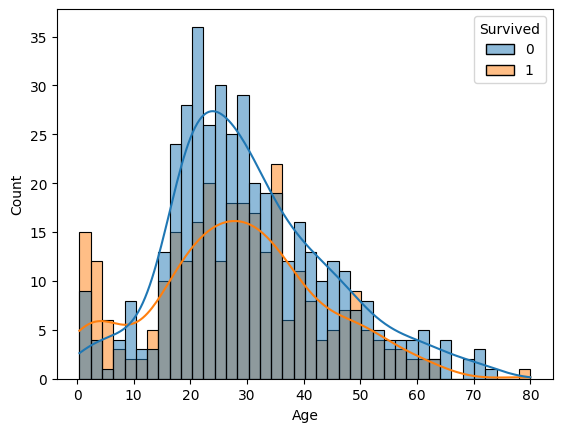

In [27]:
# 3.2 EDA for Numerical Features
# Age
sns.histplot(data=train_df,x='Age',hue="Survived",bins=40, kde=True);

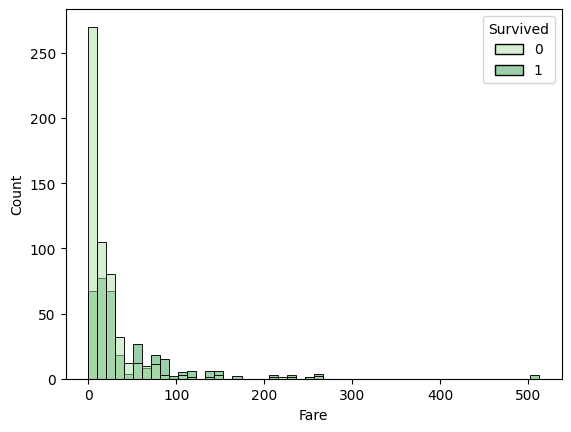

In [28]:
sns.histplot(data=train_df, x='Fare',hue='Survived',bins = 50, palette='Greens');

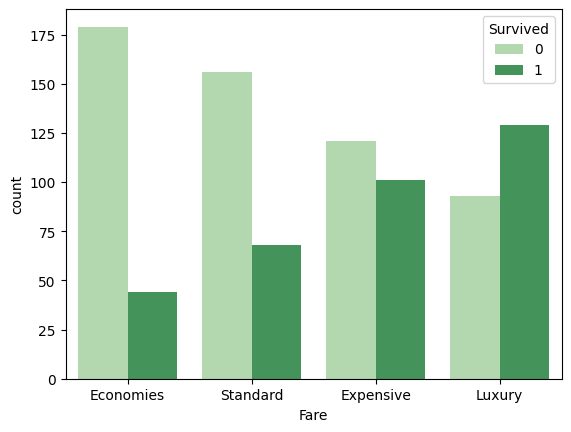

In [29]:
#cat du lieu thanh 4 khoang :
fare_categories = ['Economies','Standard','Expensive','Luxury']
quartile_data = pd.qcut(train_df['Fare'],4,labels=fare_categories)
sns.countplot(x=quartile_data, hue = train_df['Survived'],palette="Greens");

In [30]:
# Feature Engineering & Data Wrangling

train_df['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [31]:
# Regular Expression : tach xau trong string
import re

def extract_title(name):
    p = re.compile(r",([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()
train_df['Title'] = train_df['Name'].apply(lambda name:extract_title(name))

In [32]:
train_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [33]:
# FAMILY 
train_df['Family_Size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1
test_df['Family_Size'] = test_df['SibSp'].astype('int') + test_df['SibSp'].astype('int') + 1

In [34]:
train_df['Family_Cat']= pd.cut(train_df['Family_Size'],bins=[0,1,4,6,20], labels = ['Solo','Small','Medium','Large'])
test_df['Family_Cat'] = pd.cut(test_df['Family_Size'], bins = [0,1,4,6,20], labels=['Solo','Small','Medium','Large'])

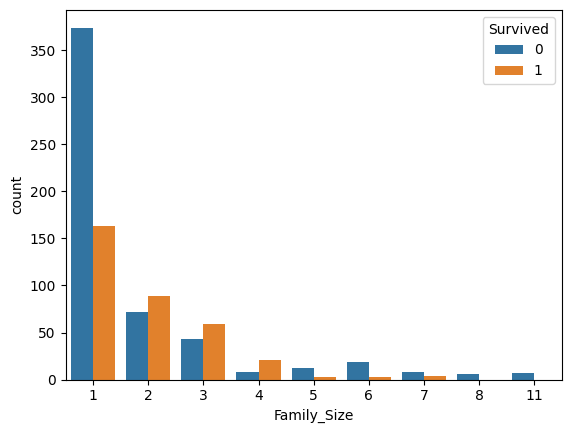

In [35]:
sns.countplot(data=train_df, x='Family_Size', hue = 'Survived');

In [36]:
train_df.describe()

,PassengerId,Age,Fare,Family_Size
count,891.000000,714.000000,891.000000,891.000000
mean,446.000000,29.699118,32.204208,1.904602
std,257.353842,14.526497,49.693429,1.613459
min,1.000000,0.420000,0.000000,1.000000
25%,223.500000,20.125000,7.910400,1.000000
50%,446.000000,28.000000,14.454200,1.000000
75%,668.500000,38.000000,31.000000,2.000000
max,891.000000,80.000000,512.329200,11.000000


In [73]:
train_df['Family_Cat']

PassengerId
1      Small
2      Small
3       Solo
4      Small
5       Solo
       ...  
887     Solo
888     Solo
889    Small
890     Solo
891     Solo
Name: Family_Cat, Length: 891, dtype: category
Categories (4, object): ['Solo' < 'Small' < 'Medium' < 'Large']

In [37]:
# data wrangling
num_features = ['Age','Fare']
cat_features = ['Sex','Pclass','Embarked','Family_Cat']
feature_cols = num_features + cat_features

print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Family_Cat']


In [38]:
# phan tram luong du lieu thieu
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"{col} has {missing_count*100/n_rows:.2f}% missing values.")
display_missing(train_df,feature_cols)
display_missing(test_df,feature_cols)

Age has 19.87% missing values.
Embarked has 0.22% missing values.
Age has 20.57% missing values.
Fare has 0.24% missing values.


In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    category
 7   Parch        891 non-null    category
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
 12  Title        891 non-null    object  
 13  Family_Size  891 non-null    int32   
 14  Family_Cat   891 non-null    category
dtypes: category(7), float64(2), int32(1), int64(1), object(4)
memory usage: 66.7+ KB


### FILLING MISSING VALUE (not the best method though)

Age 
 - filling missing value with median of the whole dataset
 
 ddể tìm đc median thì mình cần phải tìm các cái dữ liệu liên quan đến age.

Vd : nam vs nữ, Pclass, ...

In [40]:
# preporcess piplenine
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_tranformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(handle_unknown='ignore')),
])

In [67]:
train_df.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp          category
Parch          category
Ticket           object
Fare            float64
Cabin            object
Embarked       category
Title            object
Family_Size       int32
Family_Cat     category
dtype: object

In [41]:
# fit
preprocessor = ColumnTransformer(transformers=[
    ('num',num_transformer, num_features),
    ('cat', cat_tranformer, cat_features)
])

X = train_df[feature_cols]
Y = train_df['Survived']
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Family_Cat'])])

In [42]:
X = preprocessor.transform(X) # x -> x_train , X_test

In [43]:
from sklearn.model_selection import train_test_split


x_train , x_val , y_train, y_val = train_test_split(X,Y,test_size=0.2)

In [44]:
x_train.shape

(712, 14)

In [45]:
x_val.shape

(179, 14)

In [46]:
# binanry classification
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver = 'liblinear', max_iter = 1000)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [47]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    category
 2   Name         418 non-null    object  
 3   Sex          418 non-null    category
 4   Age          332 non-null    float64 
 5   SibSp        418 non-null    category
 6   Parch        418 non-null    category
 7   Ticket       418 non-null    object  
 8   Fare         417 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    category
 11  Family_Size  418 non-null    int32   
 12  Family_Cat   418 non-null    category
dtypes: category(6), float64(2), int32(1), int64(1), object(3)
memory usage: 25.1+ KB


In [48]:
log_reg.score(x_val, y_val)

0.8491620111731844

In [49]:
y_pred = log_reg.predict(x_val)

In [50]:
from sklearn.metrics import precision_score, recall_score, classification_report
precision_score(y_val,y_pred), recall_score(y_val,y_pred)

(0.8135593220338984, 0.75)

In [51]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       115
           1       0.81      0.75      0.78        64

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.85      0.85      0.85       179



Linear Regression

y = ax1 + ax2 + bias => y = ax^1 + bx^2  

In [52]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)
poly_features_X_train = poly.fit_transform(x_train)
poly_features_X_val = poly.fit_transform(x_val)



In [53]:
poly_log_reg = LogisticRegression(solver = 'liblinear', max_iter= 1000)
poly_log_reg.fit(poly_features_X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [54]:
poly_log_reg.score(poly_features_X_val,y_val)

0.8156424581005587

In [55]:
YTEST = preprocessor.transform(test_df)
y_val = log_reg.predict(YTEST)
submission = test_df[['PassengerId']]
submission['Survived'] = y_val
submission.to_csv("submission.csv", index=False)


C:\Users\minhc\AppData\Local\Temp\ipykernel_304\607739749.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Survived'] = y_val


# DECISION TREE


In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
decission_tree = DecisionTreeClassifier()
decission_tree.fit(x_train, y_train)

DecisionTreeClassifier()

# K-FOLD


![markdown](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
# cv : cross validation, dt : decision tree
log_reg_cv = LogisticRegression(solver='liblinear', max_iter=1000)
dt_cv = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2022)

lr_scores = cross_val_score(log_reg_cv, x_train, y_train, cv = 5)
# tu dong cat thanh 5 folds


In [60]:
lr_scores

array([0.77622378, 0.81818182, 0.82394366, 0.75352113, 0.8028169 ])

In [61]:
# tinh TBC , standard
lr_scores.mean(), lr_scores.std()


(0.794937456909288, 0.02649249009248106)

In [62]:
dt_scores = cross_val_score(dt_cv, x_train, y_train, scoring='accuracy', cv = 5)

In [63]:
dt_scores

array([0.8041958 , 0.83216783, 0.76760563, 0.80985915, 0.79577465])

In [64]:
dt_scores.mean(), dt_scores.std()

(0.801920614596671, 0.02096846153060032)

### BASELINE MODEL COMPARISION (ko tinh chinh)

![Markdown](https://scikit-learn.org/stable/_static/ml_map.png)


In [65]:
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

models = [
    LinearSVC(random_state=2023),
    SVC(random_state=2023),
    KNeighborsClassifier(metric='minkowski', p = 2),
    LogisticRegression(solver='liblinear', max_iter= 12000),
    DecisionTreeClassifier(random_state=2023),
    RandomForestClassifier(random_state = 2023),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric = 'logloss', random_state = 2023),
]

In [66]:
from sklearn.model_selection import StratifiedGroupKFold
def generate_baseline_result(models, x_train, y_train, metrics, cv = 5, plot_results = False):
    #define k-fold:
    kfold = StratifiedGroupKFold(cv, shuffle=True, random_state=2023)
    entries = []
    for model in models : 
        model_name = model.__class__.__name__
        scores = cross_val_score(model, x_train, y_train, scoring=metrics, cv = kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
    
    cv_df = pd.DataFrame(entries, columns=['model_name','fold_id','accuracy_score'])
    return cv_df

generate_baseline_result(models, x_train, y_train, metrics='accuracy', cv = 5, plot_results=False)

C:\Users\minhc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\minhc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\minhc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\minhc\AppData\Local\Packages\PythonSoftwareFoundation

,model_name,fold_id,accuracy_score
0,LinearSVC,0,NaN
1,LinearSVC,1,NaN
2,LinearSVC,2,NaN
3,LinearSVC,3,NaN
4,LinearSVC,4,0.0
5,SVC,0,NaN
6,SVC,1,NaN
7,SVC,2,NaN
8,SVC,3,NaN
9,SVC,4,0.0
